# Lab 5

github link: https://github.com/kelseyaguirre/Lab_5

In [226]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

## Question 1

In [199]:
#1.a
#generate simulated data
#center is the three different classes
#random_state is like setting a seed
x, y = make_blobs(n_samples = 60, centers = 3, n_features = 50, random_state = 0, cluster_std = 10)


In [200]:
#1.b
#exact same as lectures but with 3 not 4 - from our TA helping
#define the K-means as 3
kmeans = KMeans(n_clusters = 3)
#take it of x
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
#create the table
crosstab = pd.crosstab(y,y_kmeans)
#show the table
print(crosstab)

col_0   0   1   2
row_0            
0       0  20   0
1       0   0  20
2      20   0   0


After repeating the results from 1.b many times, you can see that with the 20 obervations, when K = 3 for k-means clustering the results usually mimic the true class labels. You can visualize this with 20 obervations changing between runs and being separated in each of the 3 columns on the table representation.

In [201]:
#1.c
#define the K-means as 2
kmeans = KMeans(n_clusters = 2)
#take it from simulated data
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
#create the table
crosstab = pd.crosstab(y,y_kmeans)
#show the table
print(crosstab)

col_0   0   1
row_0        
0      20   0
1       0  20
2      20   0


After repeating the results from 1.c many times, you can see that with 20 obervations and three centers, when K = 2 for k-means clustering the results basically mimic the true class labels. When K = 2 (two columns in the table) then one of the two columns usually gets 40 of the observations but they're separated by 20 and 20, similar to the true class labels. But since my standard deviation is ten, sometimes the third center will be divided among the two columns and the 20 observations are separated.

In [202]:
#1.d
#define the K-means as 4
kmeans = KMeans(n_clusters = 4)
#take it from simulated data
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
#create the table
crosstab = pd.crosstab(y,y_kmeans)
#show the table
print(crosstab)

col_0  0   1   2   3
row_0               
0      0  20   0   0
1      5   0   0  15
2      0   0  20   0


After repeating the code from 1.d many times, you can see that with 20 obervations, three centers, a seed set and the sd being ten, when K = 4 for k-means clustering the results begin to stray more from the true class labels. When K = 4, two of the four columns consistently have their 20 observations divided to still equal 20, but separated. Then sometimes, a second cluster is also separated.

In [203]:
#1.e
#changing my above work to now have a sd of 1 for question e
#changed the seed number
x, y = make_blobs(n_samples = 60, 
                  centers = 3, 
                  n_features = 50, 
                  random_state = 2, 
                  cluster_std = 1)

In [212]:
#1.e continued
#define the K-means as 3 with diff sd
kmeans = KMeans(n_clusters = 3)
#take it from new simulated data
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
#create the table
crosstab = pd.crosstab(y,y_kmeans)
#show the table
print(crosstab)

col_0   0   1   2
row_0            
0       0   0  20
1      20   0   0
2       0  20   0


In this simulation I still have: 20 obervations, three centers and a seed set, but the sd was lowered to one. After repeating the code from 1.e many times and comparing those results to 1.b, when K = 3 for k-means (same between the two) the clustering in the results here are extremely consistent, they have little variety between the clusters, and they mimic the true class labels even more due to the new lower standard deviation. This is unlike the results in 1.b because 1.b had a bit more variation.

## Question 2

In [243]:
#read in the CSV, excluding the header so the first gene is included in the set
#2.a
tissues_genes =  pd.read_csv('Documents/Data_Science_I/Week_12/Lab_5/Ch10Ex11.csv', header = None)
#first 20 columns are healthy patients and second 40 are from the diseased group
#column is the tissue sample, row is gene express

In [244]:
#transpose before clustering
tissues_genes_2 = tissues_genes.transpose()

#### Single Linkage

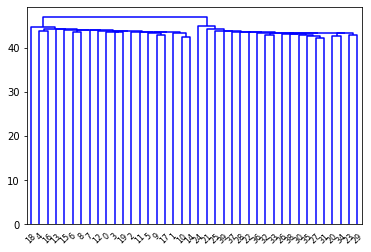

In [245]:
#2.b
#apply hierarchical clustering
#single linkage display
dend = shc.dendrogram(shc.linkage(tissues_genes_2, metric = 'Euclidean', method = 'single'))

#### Complete Linkage

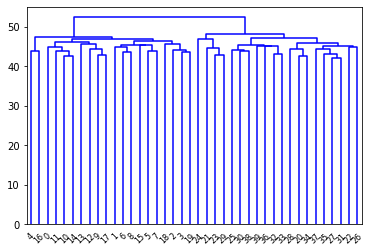

In [246]:
#apply hierarchical clustering
#complete linkage display
dend_2 = shc.dendrogram(shc.linkage(tissues_genes_2, metric = 'Euclidean', method = 'complete'))

#### Average Linkage

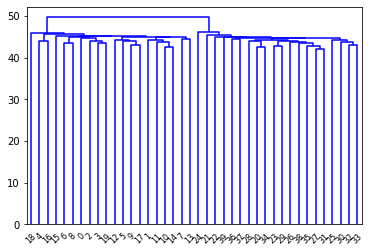

In [247]:
#apply hierarchical clustering
#average linkage display
dend_3 = shc.dendrogram(shc.linkage(tissues_genes_2, metric = 'Euclidean', method = 'average'))

Question 2: Fortunately, the genes for each dendrogram do separate into two different groups: healthy and diseased patients. As you can see, results do change between each type of linkage. For average and complete linkage you can see more inter-cluster dissimilarity, due to the nature of the calculations. Complete is the most dissimilar because its displaying the largest of the pairwise dissimilarities between cluster healthy and diseased patients. Average linkage is is displaying the average of this calculation and then single linkage is displaying the smallest, which is clear with the minimal divides and shortest distances at the top of its dendrogram.